# Evaluation

## Results

#### Auto-Mode
Nutzt eine Heuristic, eine SInE Strategy und eine Selection Function
#### Satauto-Mode
Nutzt eine Heuristic und eine Selection Function
#### Filter-after-Union
Wendet einen SInE Filter mit b=5 und k=3 nach dem Union Select mit dem Goal als Seed auf die von Union Select gewählte Menge an
#### Merge-Filter
Wendet mehrer SInE Filter mit den von Union Select gewählten Goals auf admine.sumo an und merged die Ergebnisse.  
b=5 bedeutet folgende SInE Strategien: b=5 & k=1, b=4 & k=2, ... , b=1 & k=5

### Importe

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

### Ergebnisse

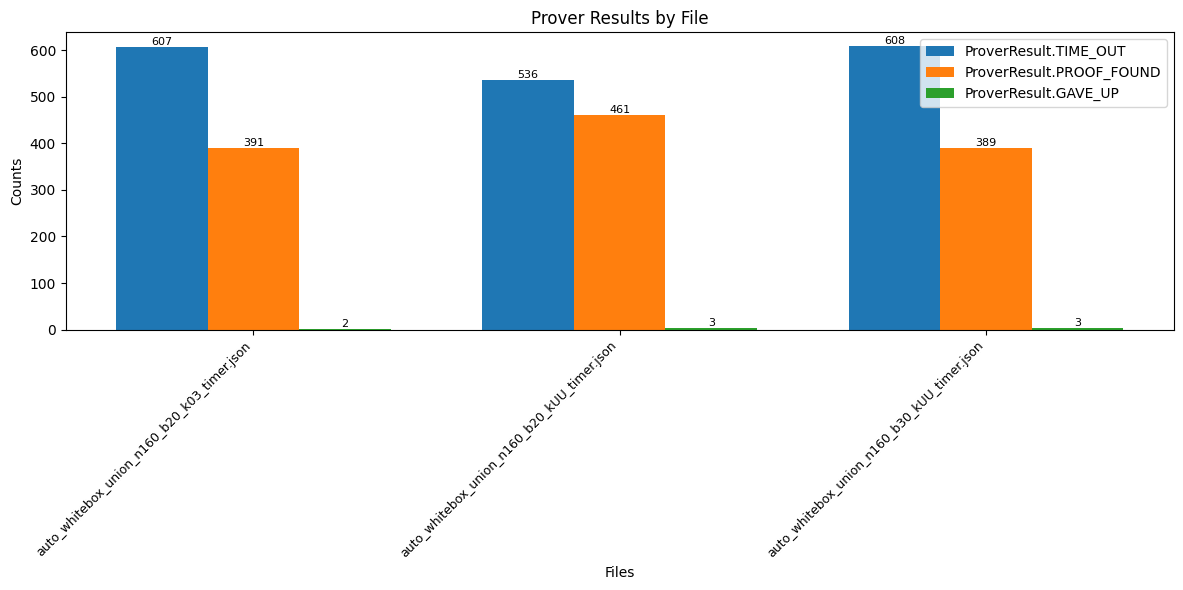

In [2]:
with open('./summary_timer_autounion.json', 'r') as file:
    data = json.load(file)
    
# Result categories
categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]

# Extract data for plotting
files = list(data.keys())
n_files = len(files)
n_categories = len(categories)

# Initialize an array for category counts
category_counts = np.zeros((n_files, n_categories), dtype=int)

# Fill the category counts
for i, (file, results) in enumerate(data.items()):
    for j, category in enumerate(categories):
        # Get the count for each category, defaulting to 0 if not present
        category_counts[i, j] = results.get(category, 0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
index = np.arange(n_files)

# Plot a bar for each category
bars = []
for j, category in enumerate(categories):
    bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category))

# Add labels, legend, and title
ax.set_xlabel('Files')
ax.set_ylabel('Counts')
ax.set_title('Prover Results by File')
ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
ax.set_xticklabels(files, rotation=45, ha='right', fontsize=9)
ax.legend()

# Add count labels above the bars
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Display the plot
plt.show()

#### Erkenntnisse
Die Anwendung von Union erzielt in Kombination mit satauto bessere Ergebnisse, als der auto-Modus von E.  
Die Verknüpfung von mehreren SInE Strategien in Kombination mit satauto erzielt das beste Ergebnis.

### Anzahl der Variablen wenn Proof Found und gesamt

In [3]:
def counts(file_path: str):
    with open(file_path) as f:
        data = json.load(f)

    # Prepare a list to store the means for each JSON file
    means = []

    # Iterate over each JSON dataset
    for file_name, counts in data.items():
        # Calculate the mean of variable counts
        variable_counts = list(counts.values())
        mean_variable_count = sum(variable_counts) / len(variable_counts)
        means.append((file_name, mean_variable_count))

    # Convert to a DataFrame for plotting
    df_means = pd.DataFrame(means, columns=['File', 'MeanVariableCount'])

    # Plot the data
    plt.figure(figsize=(12, 6))
    bars = plt.barh(df_means['File'], df_means['MeanVariableCount'], color='skyblue')
    plt.xlabel('Mean Variable Count')
    plt.title('Mean Variable Count per JSON File')
    plt.tight_layout()

    # Add text annotations (mean values) above the bars
    for bar in bars:
        plt.text(
            bar.get_width(),         # x-coordinate, right at the end of each bar
            bar.get_y() + bar.get_height() / 2,  # y-coordinate centered on the bar
            f'{bar.get_width():.2f}',   # annotation text (formatted mean value)
            va='center',              # vertical alignment
            ha='left',                # horizontal alignment
            color='black',            # text color
            fontsize=10              # font size
        )

    plt.show()

# Example usage
# variable_counts('evaluation/variable_counts_grouped.json')

##### Proof Found

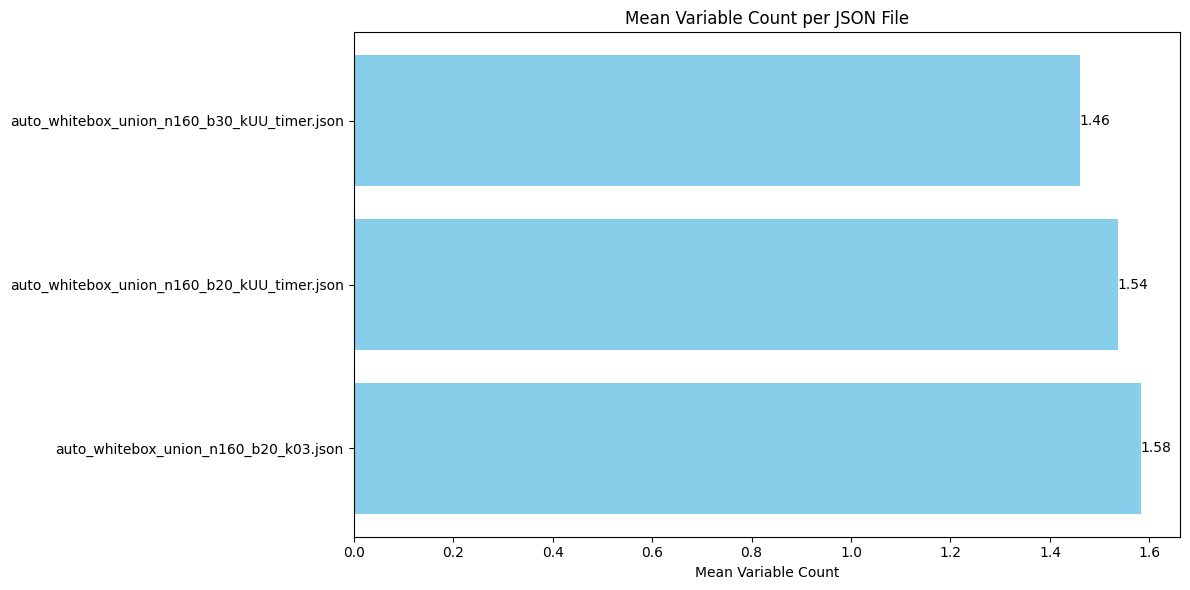

In [4]:
counts("variable_counts_grouped_proof_found_timer_autounion.json")

##### All

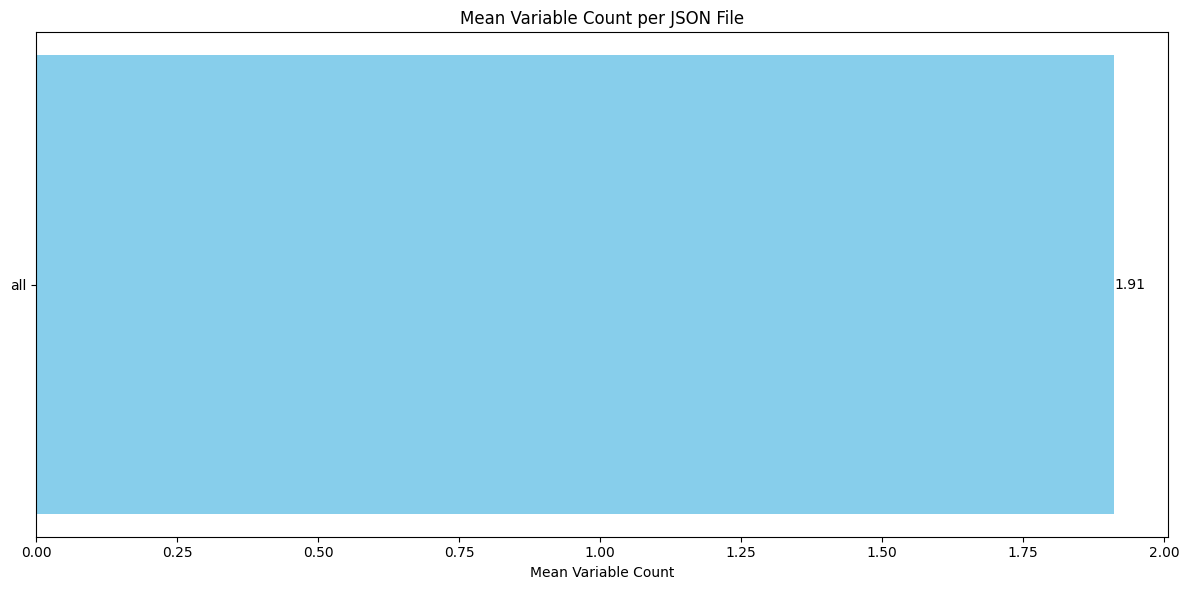

In [5]:
counts("variable_counts_grouped_all.json")

#### Count signs |, &, ?, !, ~

##### Proof Found

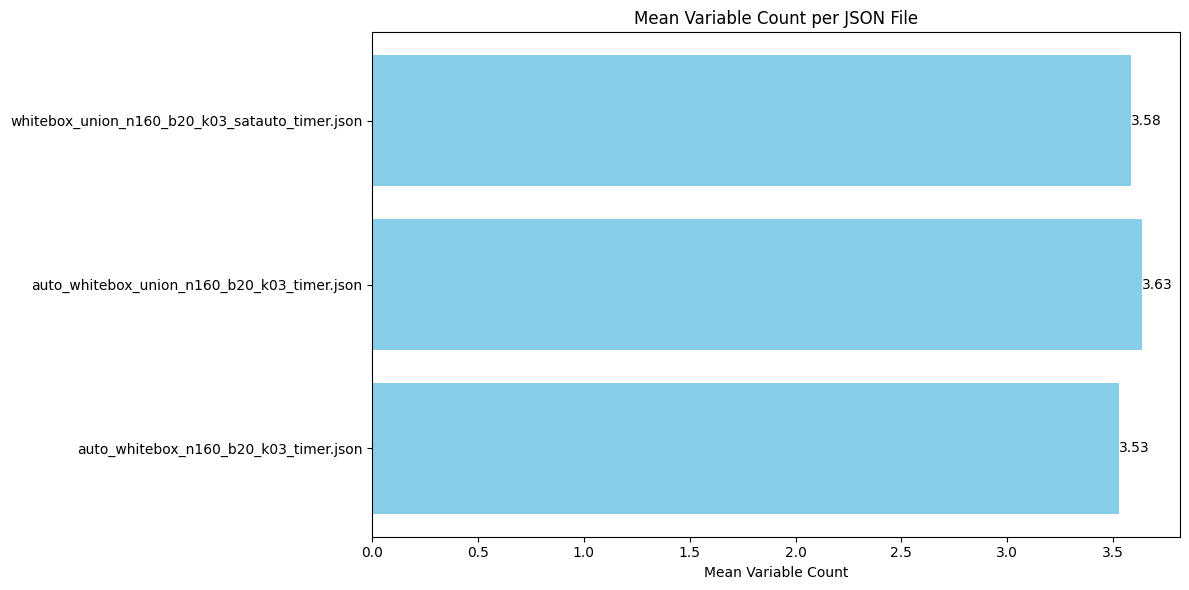

In [6]:
counts("signs_counts_grouped_proof_found_timer.json")

##### All

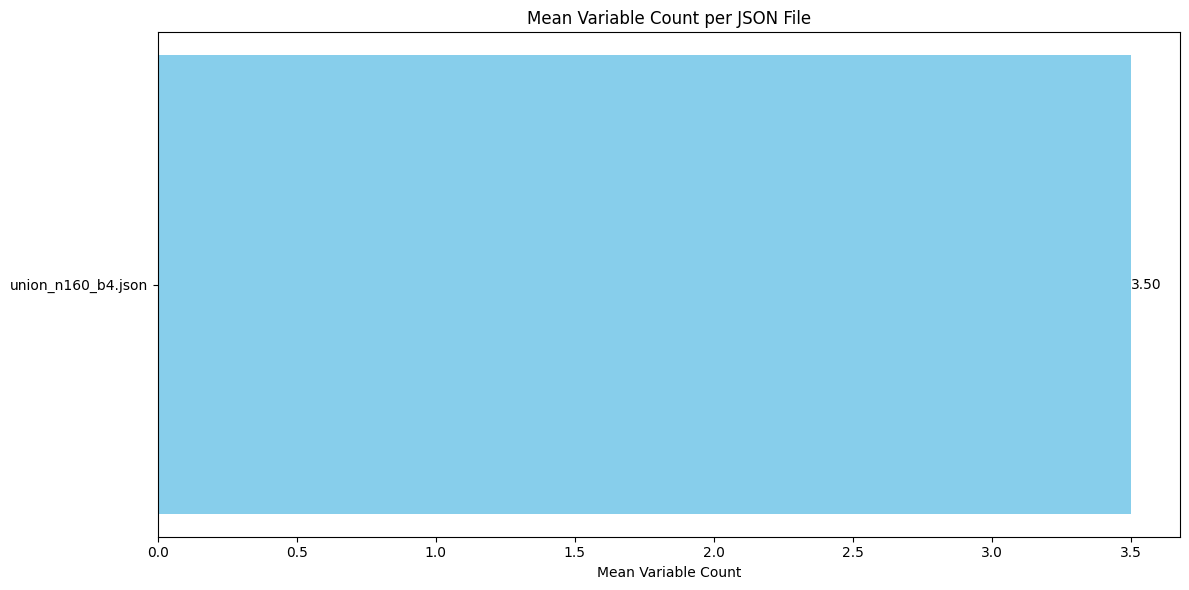

In [7]:
counts("signs_counts_grouped_all.json")

#### Character Count

##### Proof Found

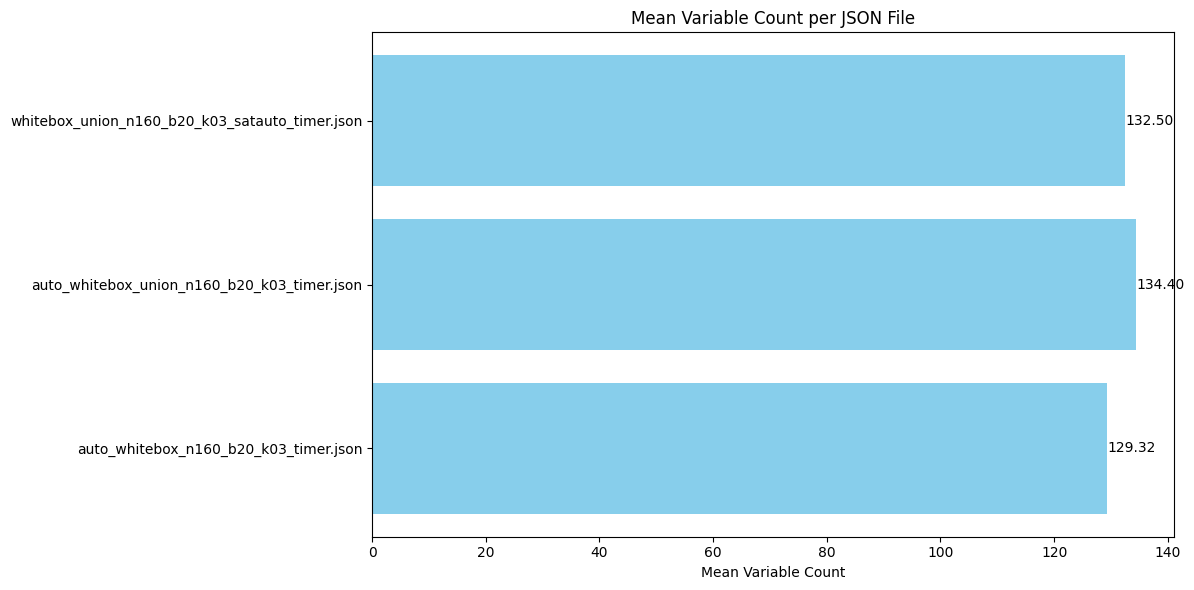

In [8]:
counts("character_counts_grouped_proof_found_timer.json")

##### All

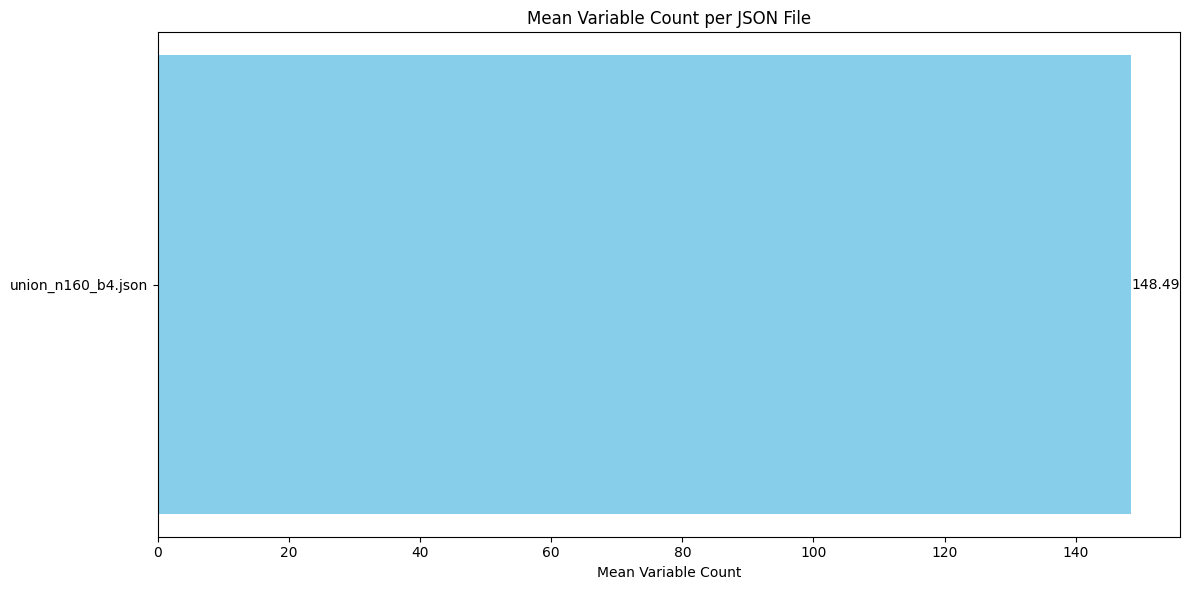

In [9]:
counts("character_counts_grouped_all.json")

#### How often do the used variables appear as variables in adimen.sumo

##### Proof Found

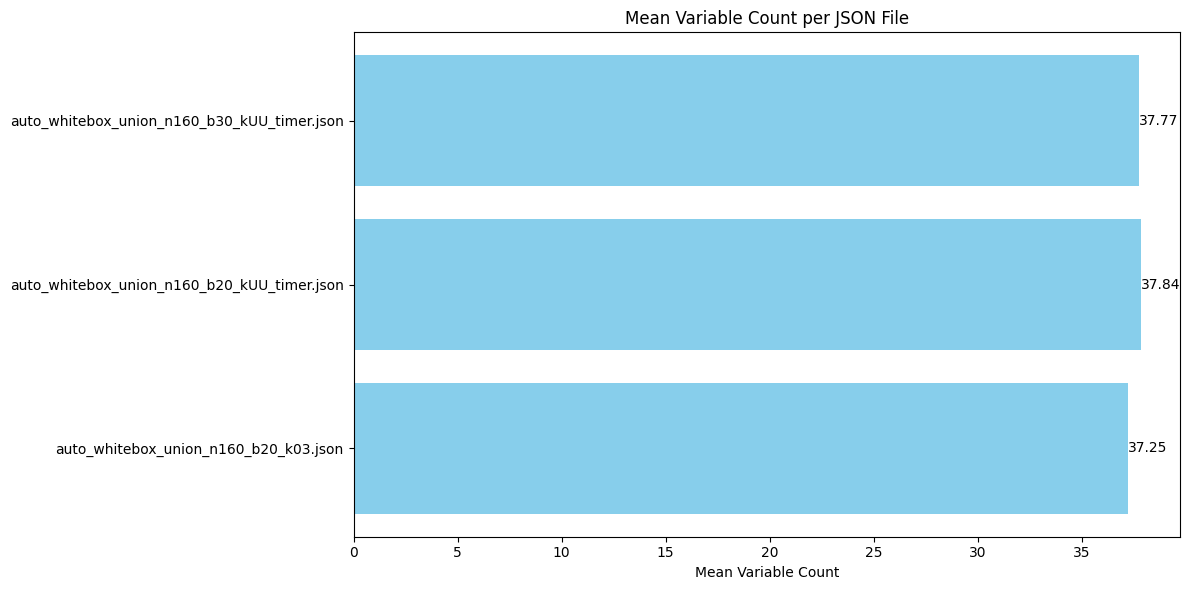

In [10]:
counts("variable_count_names_grouped_proof_found_autounion.json")

##### All

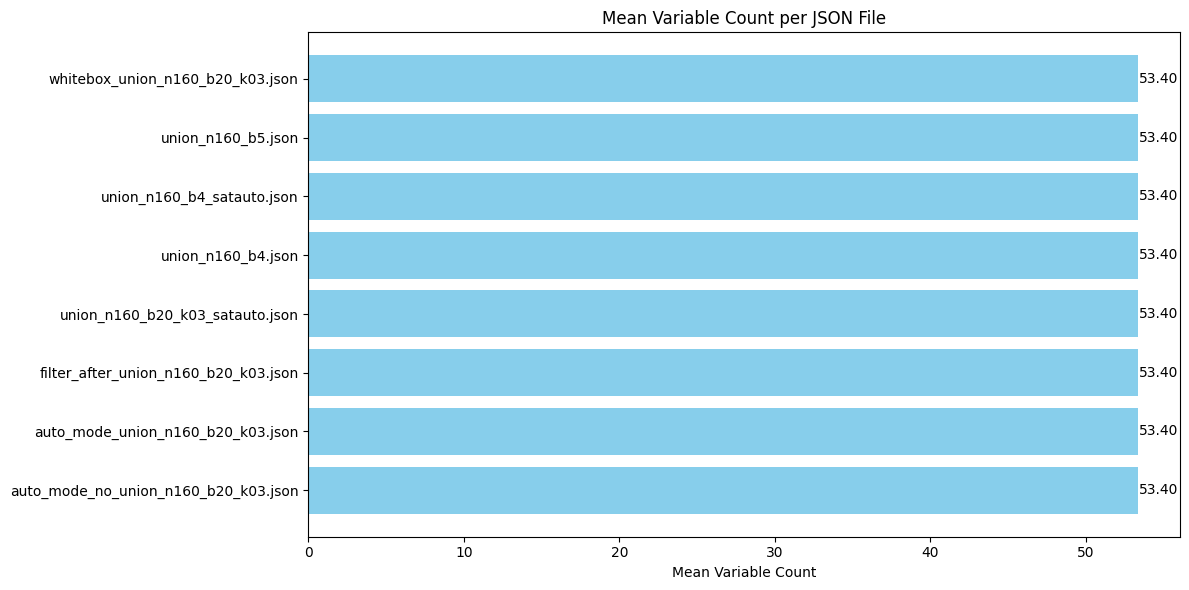

In [11]:
counts("variable_count_names_grouped_all.json")

Wie oft tritt eine Variable auf - Anzahl der Klauseln zählen in denen die Variable vorkommt  
Neue Fälle für den Union  
Warum kann man besser sein als so ein syntaktischer Solver - sind die Fälle identisch die mehr geschaffen werden? -> Fälle die sich unterscheiden sind spannend  
Zwei TimeOuts nutzen - wie viele Fälle bekommt man mit 2s oder 10s oder 100s  
Schnelligkeit messen wie lange es dauert - ist mir Union schneller?  
Man optimiert gegen den Testsatz mit WhiteBoxProofTest - kann man Axiom künstlich verlängern: alpha impliziert beta wird zu alpha impliziert beta1, beta1 impliziert beta2, beta2 impliziert beta ---> Text verlängern
Kleinerer TimeOut für erstere Studien
Semantische Nähe

Vampire als Gegenmodell zur Validität

Titel: 
- Can semantic similarities of words enhance commen sense reasoning? A case study with prover E and SUMO.
- Buzzwords: Semantic word similarity - commen sense reasoning

Hypthese: durch semantische Nähe geben wir was rein, was E so nicht wissen kann.


In [12]:
with open('../result_timer_autounion/auto_whitebox_union_n160_b20_k03_timer.json', 'r') as file:
    autounion_b2k3 = json.load(file)
with open('../result_timer_autounion/auto_whitebox_union_n160_b20_kUU_timer.json', 'r') as file:
    autounion_b2kUU = json.load(file)
with open('../result_timer_autounion/auto_whitebox_union_n160_b30_kUU_timer.json', 'r') as file:
    autounion_b3kUU = json.load(file)

In [13]:
autounion_b2k3['./goals/whitebox/whiteBoxTruthTest4664.adimen.tstp']

['ProverResult.TIME_OUT',
 "b'# SinE strategy is gf600_h_gu_R05_F100_L20000\\n# Auto-Mode selected heuristic SAT001_MinMin_NN\\n# and selection function SelectMaxLComplexAvoidPosPred.\\n#\\n# Presaturation interreduction done\\n\\n# Failure: User resource limit exceeded!\\n# SZS status ResourceOut\\n'",
 15.008136749267578]

In [14]:
autounion_b2k3_proof = []
for i in autounion_b2k3:
    if autounion_b2k3[i][0] == "ProverResult.PROOF_FOUND":
        time = autounion_b2k3[i][2]
        autounion_b2k3_proof.append((i, time))
autounion_b2kUU_proof = []
for i in autounion_b2kUU:
    if autounion_b2kUU[i][0] == "ProverResult.PROOF_FOUND":
        time = autounion_b2kUU[i][2]
        autounion_b2kUU_proof.append((i, time))
autounion_b3kUU_proof = []
for i in autounion_b3kUU:
    if autounion_b3kUU[i][0] == "ProverResult.PROOF_FOUND":
        time = autounion_b3kUU[i][2]
        autounion_b3kUU_proof.append((i, time))

In auto_no_union_proof but not in others

In [15]:
def find_diff_entries(list1, list2):
    """
    Find entries in list1 that have paths not present in list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths not found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find unique paths in list1 that are not in list2
    unique_paths_list1 = paths_list1 - paths_list2

    # Build the list of unique entries based on the unique paths
    unique_entries = [entry for entry in list1 if entry[0] in unique_paths_list1]

    return unique_entries

In [16]:
b2k3_no_b2kUU = find_diff_entries(autounion_b2k3_proof, autounion_b2kUU_proof)
b2k3_no_b3kUU = find_diff_entries(autounion_b2k3_proof, autounion_b3kUU_proof)
b2kUU_no_b2k3 = find_diff_entries(autounion_b2kUU_proof, autounion_b2k3_proof)
b2kUU_no_b3kUU = find_diff_entries(autounion_b2kUU_proof, autounion_b3kUU_proof)
b3kUU_no_b2k3 = find_diff_entries(autounion_b3kUU_proof, autounion_b2k3_proof)
b3kUU_no_b2kUU = find_diff_entries(autounion_b3kUU_proof, autounion_b2kUU_proof)

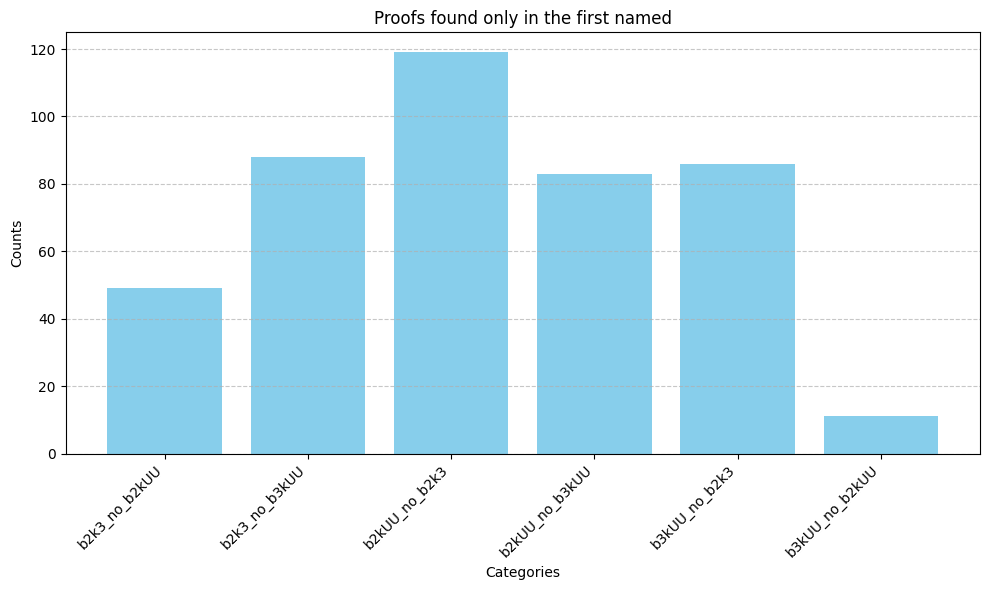

In [17]:
# Data labels
categories = [
    "b2k3_no_b2kUU", 
    "b2k3_no_b3kUU", 
    "b2kUU_no_b2k3", 
    "b2kUU_no_b3kUU", 
    "b3kUU_no_b2k3", 
    "b3kUU_no_b2kUU"
]

# Corresponding values
values = [len(b2k3_no_b2kUU), len(b2k3_no_b3kUU), 
          len(b2kUU_no_b2k3), len(b2kUU_no_b3kUU), 
          len(b3kUU_no_b2k3), len(b3kUU_no_b2kUU)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')

# Add title and labels
plt.title("Proofs found only in the first named")
plt.xlabel("Categories")
plt.ylabel("Counts")

# Rotate category labels on x-axis for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [18]:
time_b2k3 = [entry[1] for entry in autounion_b2k3_proof]
time_b2kUU = [entry[1] for entry in autounion_b2kUU_proof]
time_b3kUU = [entry[1] for entry in autounion_b3kUU_proof]

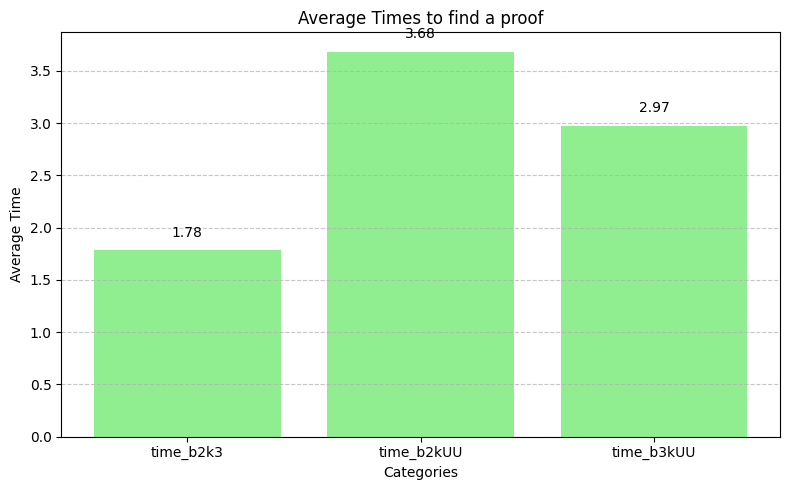

In [19]:

# Data labels
categories = [
    "time_b2k3",
    "time_b2kUU",
    "time_b3kUU"
]

# Corresponding average values
averages = [
    sum(time_b2k3)/len(time_b2k3),
    sum(time_b2kUU)/len(time_b2kUU),
    sum(time_b3kUU)/len(time_b3kUU)
]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, averages, color='lightgreen')

# Add title and labels
plt.title("Average Times to find a proof")
plt.xlabel("Categories")
plt.ylabel("Average Time")

# Annotate the bars with the average values
for i, avg in enumerate(averages):
    plt.text(i, avg + 0.1, f"{avg:.2f}", ha='center', va='bottom')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [20]:
def find_common_entries(list1, list2):
    """
    Find entries that have paths present in both list1 and list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths also found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find common paths between list1 and list2
    common_paths = paths_list1 & paths_list2

    # Build the list of common entries based on the common paths
    common_entries = [entry for entry in list1 if entry[0] in common_paths]

    return common_entries

In [21]:
b2k3_with_b2kUU = find_common_entries(autounion_b2k3_proof, autounion_b2kUU_proof)
b2k3_with_b3kUU = find_common_entries(autounion_b2k3_proof, autounion_b3kUU_proof)
b2kUU_with_b2k3 = find_common_entries(autounion_b2kUU_proof, autounion_b2k3_proof)
b2kUU_with_b3kUU = find_common_entries(autounion_b2kUU_proof, autounion_b3kUU_proof)
b3kUU_with_b2k3 = find_common_entries(autounion_b3kUU_proof, autounion_b2k3_proof)
b3kUU_with_b2kUU = find_common_entries(autounion_b3kUU_proof, autounion_b2kUU_proof)

In [22]:
def average_time(listo):
    timelist = [a[1] for a in listo]
    return sum(timelist)/len(timelist)

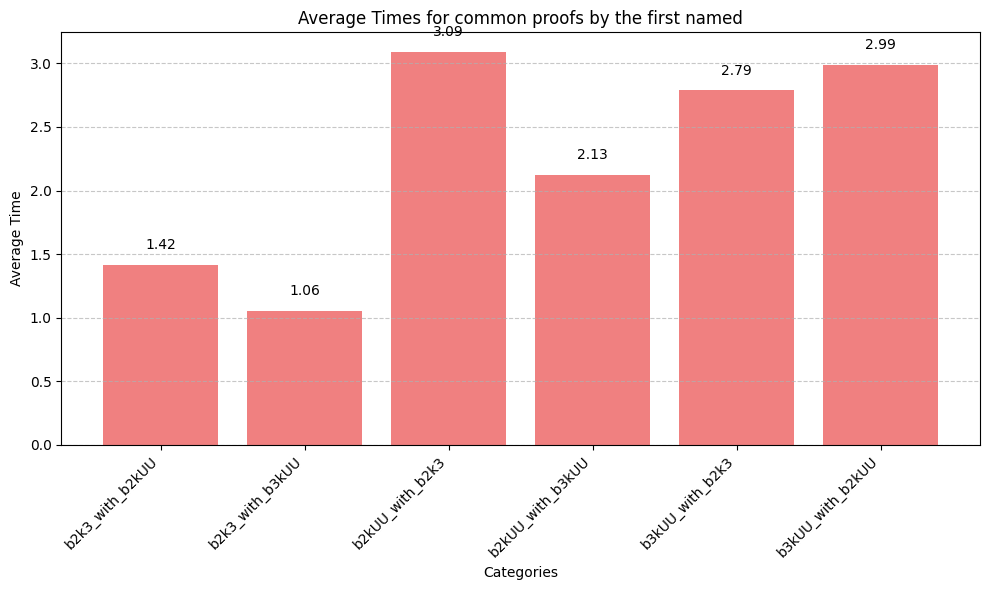

In [23]:

# Sample average time results from the average_time function
# (You will replace these with the actual function call results)
average_times = [
    average_time(b2k3_with_b2kUU),
    average_time(b2k3_with_b3kUU),
    average_time(b2kUU_with_b2k3),
    average_time(b2kUU_with_b3kUU),
    average_time(b3kUU_with_b2k3),
    average_time(b3kUU_with_b2kUU)
]

# Labels corresponding to each category
categories = [
    "b2k3_with_b2kUU",
    "b2k3_with_b3kUU",
    "b2kUU_with_b2k3",
    "b2kUU_with_b3kUU",
    "b3kUU_with_b2k3",
    "b3kUU_with_b2kUU"
]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, average_times, color='lightcoral')

# Add title and labels
plt.title("Average Times for common proofs by the first named")
plt.xlabel("Categories")
plt.ylabel("Average Time")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the average time value
for i, avg in enumerate(average_times):
    plt.text(i, avg + 0.1, f"{avg:.2f}", ha='center', va='bottom')

# Add grid lines to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
def read_file_lines(file_path):
    """Read the lines from a file and return them as a set."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return set(file.readlines())

def compare_files(file1_path, file2_path):
    """Compare lines in two files and print lines from file1 that are in file2."""
    # Read lines from both files
    file1_lines = read_file_lines(file1_path)
    file2_lines = read_file_lines(file2_path)

    # Check for lines in file1 that are also in file2
    common_lines = file1_lines.intersection(file2_lines)

    return list(common_lines)

# Paths to the files you want to compare
file1_path = '../selection_autounion/whiteBoxTruthTest4467_b20_kUU.tstp'  # replace with your actual file path
file2_path = '../selection_autounion/whiteBoxTruthTest4467_b30_kUU.tstp'  # replace with your actual file path

# Call the function to compare files
line = compare_files(file1_path, file2_path)

In [25]:
len(line)

3674

ALL LINES OF b2k3 are also in b2kUU and all LINES of b2kUU are in b3kUU

# IMPORTANT
used version: 2.6 - with 3.1 Union aint better and satauto not working

Mitschrift: Gibt es wiederkehrende Axiome -> Eigenschaft der Wissensbasis -> Eigenschaft der SUMO Onthologie  
Kann man E verwirren?  
Heterogenase Tool Sets - HETS -   
Warum Vampire: proofer unabhängig -  
Warum funktioniert das mit der semantischen Nähe? eine natürliche sprachliche wortnähe ist eine approximation von  
Weil aus Texten gelernt wurde, dass dies öfter eingebracht wird, was nahe dran ist  

Problem: Basisaxiome werden übergangen -> wenn man diese schafft zu erkennen, dann hat man eine gute Strategie  

Titel eines Paperes: Sementaci word similarity can provide a aproximation for proove relevance axioms  

Zu testen: wie weit sind die Axiome die ausgewählt  
Laufzeit wird reudziert wenn die Axiome gewählt werden, in dem Proof enthalten sind  

These: semantische Nähe funktioniert -> maschinenbeweise haben ein Delta und daher fehlt etwas wenn man semantische Nähe rein bringt

Vampire laufen lassen  
Kernaxiome finden